In [1]:

import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [3]:
phish_data.head()

URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad

In [4]:
phish_data.tail()

URL Label
549341     23.227.196.215/   bad
549342  apple-checker.org/   bad
549343   apple-iclods.org/   bad
549344  apple-uptoday.org/   bad
549345   apple-search.info   bad

In [5]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
label_cnts = pd.DataFrame(phish_data.Label.value_counts())
label_cnts

Label
good  392924
bad   156422

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [9]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [10]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [11]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.465869899999234 sec


In [12]:
phish_data.sample(5)

URL Label  \
340988                            fordlift-kits-4you.com/  good   
321544  emusic.com/artist/Unwritten-Law-MP3-Download/1...  good   
209336                       logos.wikia.com/wiki/VRAK.TV  good   
29641   www.paypal.com.system.secure.biling.confirm.se...   bad   
144053  archiver.rootsweb.ancestry.com/th/index/MIKALA...  good   

                                           text_tokenized  
340988                         [fordlift, kits, you, com]  
321544  [emusic, com, artist, Unwritten, Law, MP, Down...  
209336                [logos, wikia, com, wiki, VRAK, TV]  
29641   [www, paypal, com, system, secure, biling, con...  
144053  [archiver, rootsweb, ancestry, com, th, index,...

In [13]:
stemmer = SnowballStemmer("english") # choose a language

In [14]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...


Time taken 47.69311169999855 sec


In [15]:
phish_data.sample(5)

URL Label  \
536695  try.beakerking.com/?xH6Af7iVKBfJCIM=l3SKfPrfJx...   bad   
7055    designatshirts.com.au/js/natwest.com/personal....   bad   
355172   houseofnames.com/nixon-family-crest/?A=54323-224  good   
25718          www.evinqo.com/eforms/use/index/form1.html   bad   
301124         cduniverse.com/productinfo.asp?pid=1181611  good   

                                           text_tokenized  \
536695  [try, beakerking, com, xH, Af, iVKBfJCIM, l, S...   
7055    [designatshirts, com, au, js, natwest, com, pe...   
355172       [houseofnames, com, nixon, family, crest, A]   
25718   [www, evinqo, com, eforms, use, index, form, h...   
301124           [cduniverse, com, productinfo, asp, pid]   

                                             text_stemmed  
536695  [tri, beakerk, com, xh, af, ivkbfjcim, l, skfp...  
7055    [designatshirt, com, au, js, natwest, com, per...  
355172         [houseofnam, com, nixon, famili, crest, a]  
25718   [www, evinqo, com, eform, use, index, form, html]  
301124            [cdunivers, com, productinfo, asp, pid]

In [16]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.2666724000009708 sec


In [17]:
phish_data.sample(5)

URL Label  \
346128  globenewswire.com/newsroom/news.html?d=149025  good   
480699       salary.com/Human-Resources-Salaries.html  good   
543452                    rosispitaniya.com/8fyvlyqd9   bad   
96087                      rl8vd.kikul.com/ci7ka5t2ue   bad   
475533                youtube.com/watch?v=aCvB2IpNxHk  good   

                                         text_tokenized  \
346128    [globenewswire, com, newsroom, news, html, d]   
480699  [salary, com, Human, Resources, Salaries, html]   
543452                    [rosispitaniya, com, fyvlyqd]   
96087               [rl, vd, kikul, com, ci, ka, t, ue]   
475533           [youtube, com, watch, v, aCvB, IpNxHk]   

                                        text_stemmed  \
346128  [globenewswir, com, newsroom, news, html, d]   
480699   [salari, com, human, resourc, salari, html]   
543452                 [rosispitaniya, com, fyvlyqd]   
96087            [rl, vd, kikul, com, ci, ka, t, ue]   
475533         [youtub, com, watch, v, acvb, ipnxhk]   

                                    text_sent  
346128  globenewswir com newsroom news html d  
480699   salari com human resourc salari html  
543452              rosispitaniya com fyvlyqd  
96087              rl vd kikul com ci ka t ue  
475533         youtub com watch v acvb ipnxhk

In [18]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [19]:
bad_sites.head()

URL Label  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad   
3  mail.printakid.com/www.online.americanexpress....   bad   
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad   

                                      text_tokenized  \
0  [nobell, it, ffb, d, dca, cce, f, login, SkyPe...   
1  [www, dghjdgf, com, paypal, co, uk, cycgi, bin...   
2  [serviciosbys, com, paypal, cgi, bin, get, int...   
3  [mail, printakid, com, www, online, americanex...   
4  [thewhiskeydregs, com, wp, content, themes, wi...   

                                        text_stemmed  \
0  [nobel, it, ffb, d, dca, cce, f, login, skype,...   
1  [www, dghjdgf, com, paypal, co, uk, cycgi, bin...   
2  [serviciosbi, com, paypal, cgi, bin, get, into...   
3  [mail, printakid, com, www, onlin, americanexp...   
4  [thewhiskeydreg, com, wp, content, theme, wide...   

                                           text_sent  
0  nobel it ffb d dca cce f login skype com en cg...  
1  www dghjdgf com paypal co uk cycgi bin webscrc...  
2  serviciosbi com paypal cgi bin get into herf s...  
3  mail printakid com www onlin americanexpress c...  
4  thewhiskeydreg com wp content theme widescreen...

In [20]:

good_sites.head()

URL Label  \
18231  esxcc.com/js/index.htm?us.battle.net/noghn/en/...  good   
18232  wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...  good   
18233  'www.institutocgr.coo/web/media/syqvem/dk-óij...  good   
18234                  Yìê
koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í  good   
18236  ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...  good   

                                          text_tokenized  \
18231  [esxcc, com, js, index, htm, us, battle, net, ...   
18232  [www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...   
18233  [www, institutocgr, coo, web, media, syqvem, d...   
18234                                  [Y, ko, D, l, qt]   
18236  [ruta, fm, com, images, AS, Vies, i, cf, b, vc...   

                                            text_stemmed  \
18231  [esxcc, com, js, index, htm, us, battl, net, n...   
18232  [www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...   
18233  [www, institutocgr, coo, web, media, syqvem, d...   
18234                                  [y, ko, d, l, qt]   
18236  [ruta, fm, com, imag, as, vie, i, cf, b, vc, f...   

                                               text_sent  
18231  esxcc com js index htm us battl net noghn en r...  
18232  www eira nvinip nch wv ydah ye u rt u g m i xz...  
18233  www institutocgr coo web media syqvem dk ij r ...  
18234                                        y ko d l qt  
18236  ruta fm com imag as vie i cf b vc f d b g sd v...

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import STOPWORDS

In [22]:
# create a function to visualize the important keys from url
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [23]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

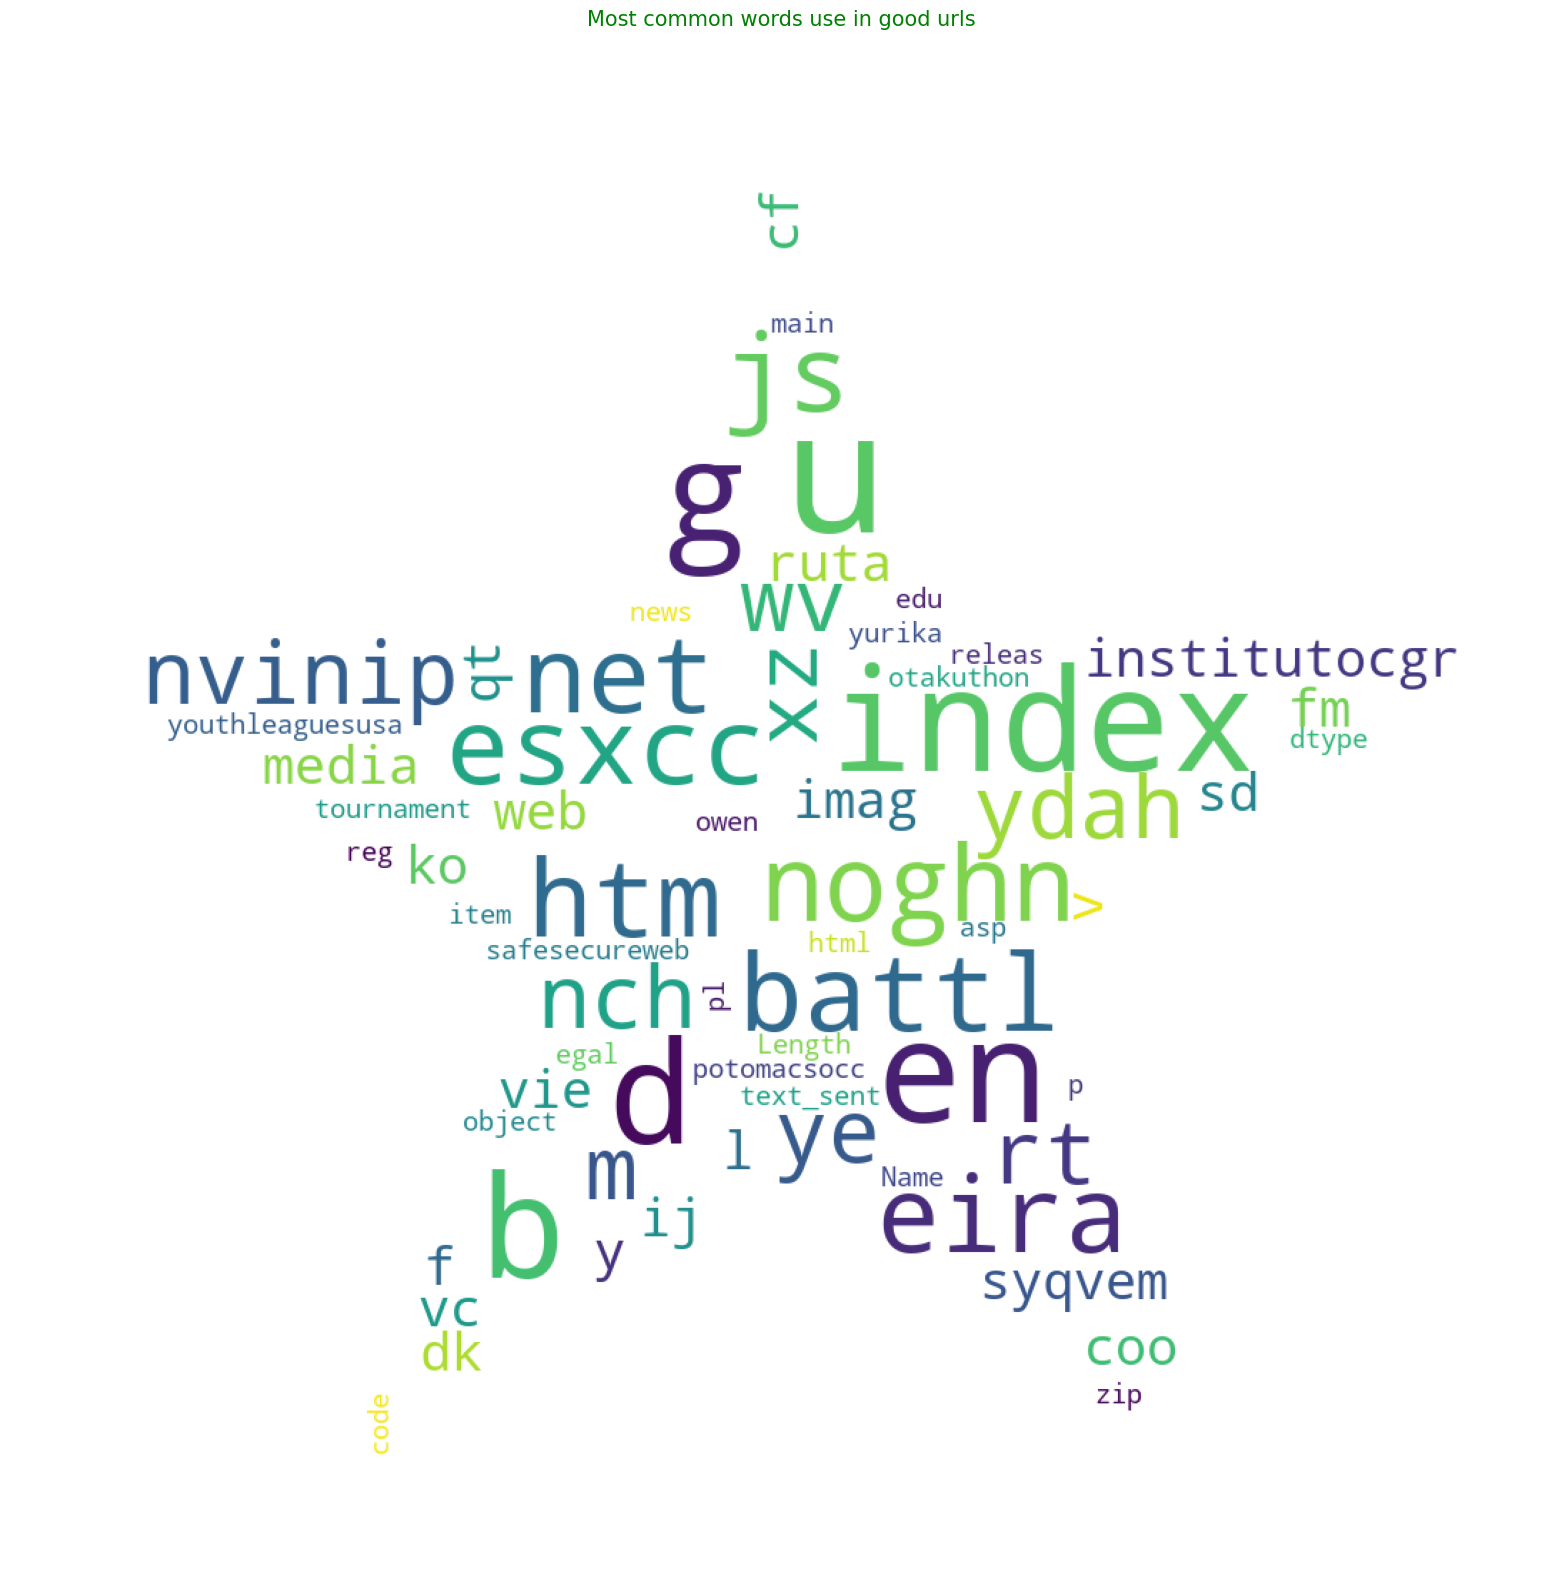

In [24]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [25]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

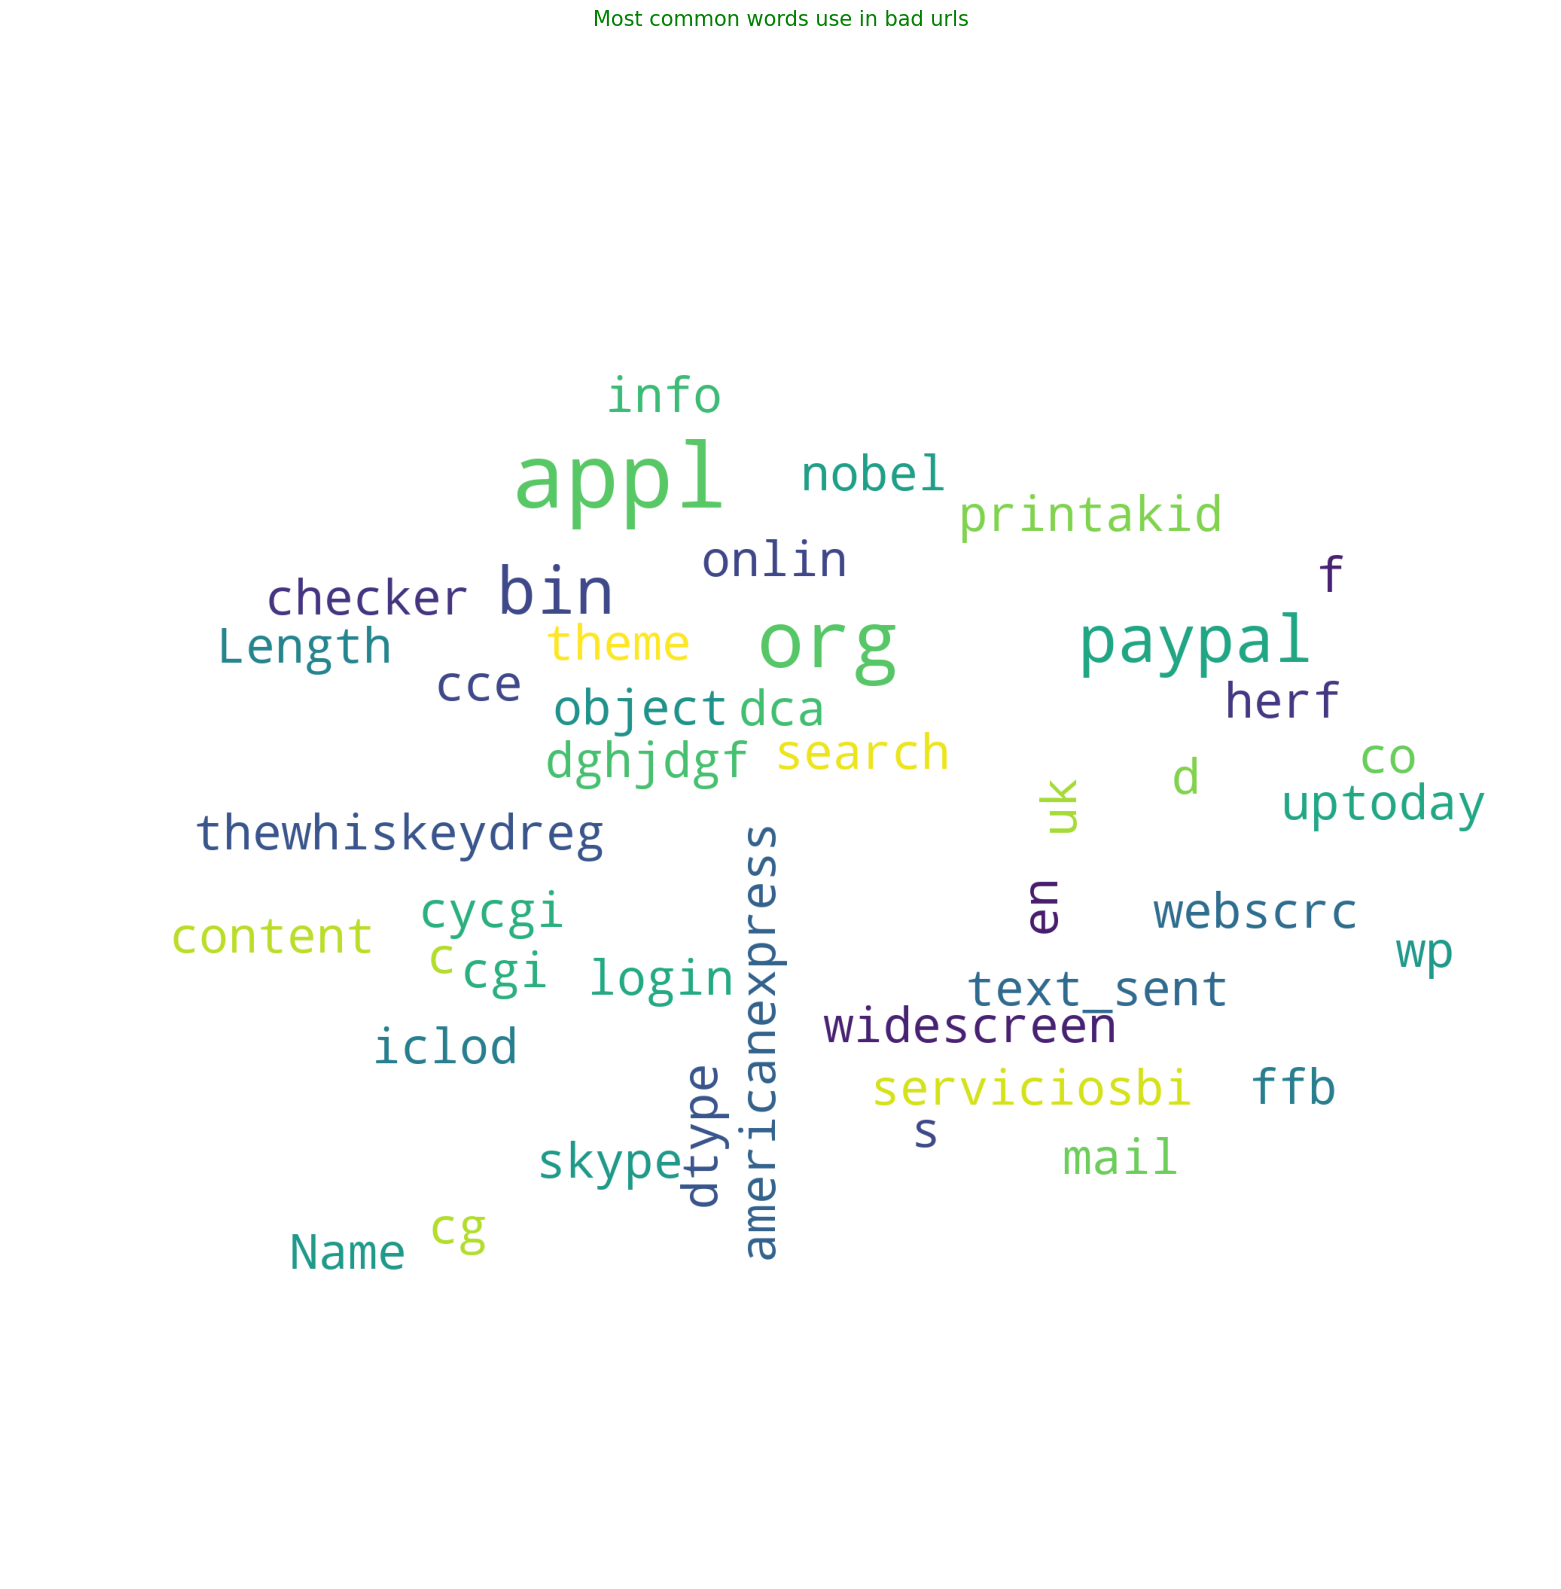

In [26]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [27]:
browser = webdriver.Chrome()

In [28]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
links_with_text = []

In [29]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [30]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [31]:
df.head()

from  \
0          https://www.ezeephones.com/   
1          https://www.ezeephones.com/   
2          https://www.ezeephones.com/   
3          https://www.ezeephones.com/   
4  https://www.ezeephones.com/about-us   

                                                  to  
0  https://sedo.com/search/details/?partnerid=144...  
1  https://sedo.com/search/details/?partnerid=144...  
2         https://www.sedo.com/services/parking.php3  
3                                                  #  
4  https://sedo.com/search/details/?partnerid=144...

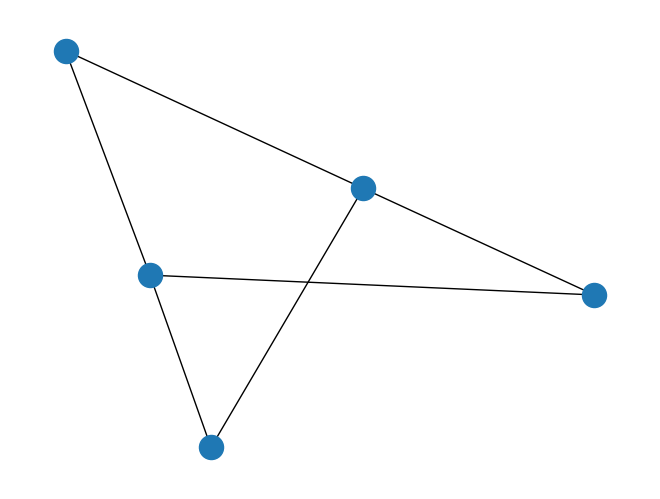

In [32]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

In [33]:
#create cv object
cv = CountVectorizer()

In [34]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [35]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [37]:
# create lr object
lr = LogisticRegression()

In [38]:
lr.fit(trainX,trainY)

LogisticRegression()

In [39]:
lr.score(testX,testY)

0.9648747242185282

In [40]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9798014121050753
Testing Accuracy : 0.9648747242185282

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36613
        Good       0.99      0.96      0.98    100724

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.97    137337


CONFUSION MATRIX


<AxesSubplot: >

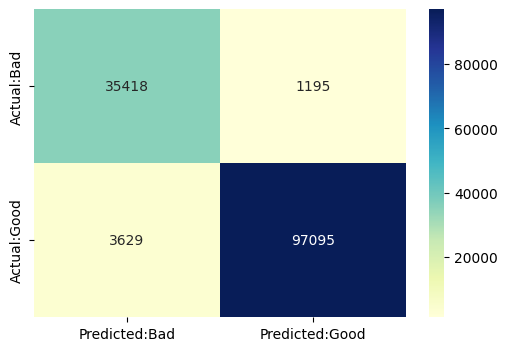

In [41]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [42]:
# create mnb object
mnb = MultinomialNB()

In [43]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [44]:
mnb.score(testX,testY)

0.9578846195853994

In [45]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9740855175493739
Testing Accuracy : 0.9578846195853994

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93     38107
        Good       0.98      0.97      0.97     99230

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot: >

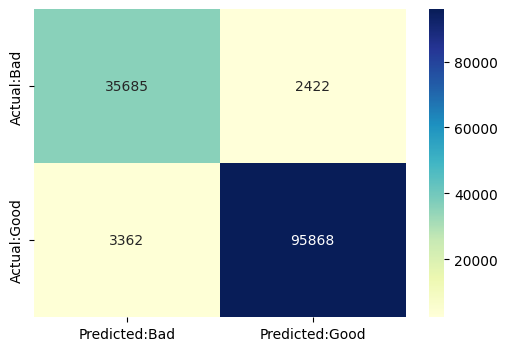

In [46]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [48]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [49]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [50]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [51]:
pipeline_ls.score(testX,testY)

0.9674741693789729

Training Accuracy : 0.9816533133984937
Testing Accuracy : 0.9674741693789729

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     37069
        Good       0.99      0.97      0.98    100268

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot: >

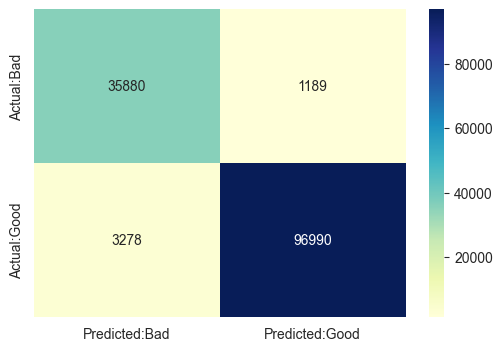

In [52]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [53]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [54]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9674741693789729


In [55]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','youtube.com/','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
# predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
pred = ['https://wa.me/919022835358']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(pred)
result2 = loaded_model.predict(predict_bad)
print(result)
print("*"*30)
# print(result2)

['bad']
******************************
